In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
def get_rms(data, n):
    new = np.zeros(data.shape)
    for channel in range(data.shape[1]):
        for current in range(data.shape[0]):
            suma = 0
            for window in range(current, current - n, -1):
                suma += data[window, channel] * data[window, channel]
            new[current, channel] = (np.sqrt((1/n)*suma) / 128) if channel != 8 else data[current, channel]
    #plt.figure()
    #plt.plot(data)
    #plt.figure()
    #plt.plot(new)
    return new

def peel_labels(data):
    return data[:,:8], data[:,8]

def get_values(seshes):
    big_matrix = np.zeros((0, 9))
    for sesh in seshes:
        print(sesh[0])
        for gesture in range(8):
            matrix = np.genfromtxt(sesh[0] + "/" + str(gesture) + ".txt", delimiter=",")
            rms = get_rms(matrix, 50)
            big_matrix = np.concatenate((big_matrix, rms), axis = 0)
    return big_matrix

In [3]:
readings = "../myo-readings-dataset/_readings/"
seshes = list(os.walk(readings))[1:]
np.random.shuffle(seshes)
siz = len(seshes)
split1 = int(0.6 * siz)
split2 = int(0.8 * siz)
train_set, valid_set, test_set = get_values(seshes[:split1]), \
                                 get_values(seshes[split1:split2]), \
                                 get_values(seshes[split2:])

train, train_labels = peel_labels(train_set)
valid, valid_labels = peel_labels(valid_set)
test, test_labels = peel_labels(test_set)

../myo-readings-dataset/_readings/AM-S2
../myo-readings-dataset/_readings/Session AK at 03_09_2021, 11_30_40
../myo-readings-dataset/_readings/Meritve seja 2
../myo-readings-dataset/_readings/session2
../myo-readings-dataset/_readings/Session AK at 03_09_2021, 18_29_33
../myo-readings-dataset/_readings/seja-2
../myo-readings-dataset/_readings/Seja 2
../myo-readings-dataset/_readings/sk_readings_1615834972_s03
../myo-readings-dataset/_readings/Seja 3
../myo-readings-dataset/_readings/session_3_SH
../myo-readings-dataset/_readings/seja_ao_3
../myo-readings-dataset/_readings/session3
../myo-readings-dataset/_readings/session 02
../myo-readings-dataset/_readings/Seja 03
../myo-readings-dataset/_readings/myo_session2
../myo-readings-dataset/_readings/mi-seja2
../myo-readings-dataset/_readings/seja_ao_1
../myo-readings-dataset/_readings/record_1
../myo-readings-dataset/_readings/Seja 01
../myo-readings-dataset/_readings/mi-seja1
../myo-readings-dataset/_readings/myo_session1
../myo-readings-

In [4]:
cat_train_labels = keras.utils.to_categorical(train_labels)
cat_valid_labels = keras.utils.to_categorical(valid_labels)
cat_test_labels = keras.utils.to_categorical(test_labels)

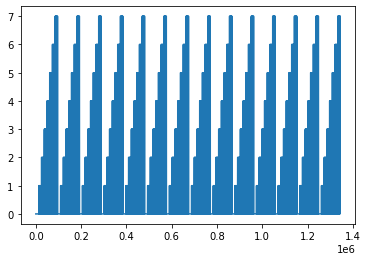

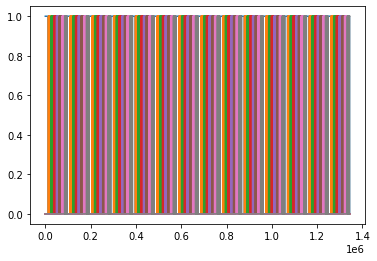

In [5]:
plt.figure()
plt.plot(test_labels)
plt.figure()
plt.plot(cat_test_labels)

In [6]:
model = keras.Sequential([
    keras.layers.Dense(300, activation = "relu", input_shape = (8,)),
    keras.layers.Dense(200, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(50, activation = "relu"),
    keras.layers.Dense(8, activation = "sigmoid")
])

opt = keras.optimizers.Adam()
loss = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer = opt, loss = loss, metrics = ["accuracy"])

In [7]:
history = model.fit(train, cat_train_labels, validation_data = (valid, cat_valid_labels), epochs=15)

Epoch 1/15
117101/117101 [==============================] - 166s 1ms/step - loss: 0.5688 - accuracy: 0.8249 - val_loss: 1.5117 - val_accuracy: 0.6719
Epoch 2/15
117101/117101 [==============================] - 162s 1ms/step - loss: 0.3339 - accuracy: 0.8995 - val_loss: 1.7356 - val_accuracy: 0.6695
Epoch 3/15
117101/117101 [==============================] - 161s 1ms/step - loss: 0.2952 - accuracy: 0.9104 - val_loss: 1.7895 - val_accuracy: 0.6796
Epoch 4/15
117101/117101 [==============================] - 176s 1ms/step - loss: 0.2732 - accuracy: 0.9167 - val_loss: 1.8931 - val_accuracy: 0.6779
Epoch 5/15
117101/117101 [==============================] - 161s 1ms/step - loss: 0.2592 - accuracy: 0.9206 - val_loss: 1.9991 - val_accuracy: 0.6721
Epoch 6/15
 26212/117101 [=====>........................] - ETA: 2:14 - loss: 0.2480 - accuracy: 0.9241 ETA: 2:14 -

KeyboardInterrupt: 

In [8]:
model.evaluate(test, cat_test_labels)

41991/41991 [==============================] - 35s 828us/step - loss: 1.9197 - accuracy: 0.6753 34s - loss: 1.7531 - accuracy: 0.84 - ETA: 34s - loss: 2.5478 - accuracy: 0.7 - ETA: 35s - loss - ETA: 33s - loss: - ETA: 31s - loss: 2.5024 - accuracy: 0.62 - ETA: 31s - loss: 2.4712 - accuracy: 0. - ETA: 31s - loss: 2.4260 - - ETA: 30s - lo - ETA: 28s - loss: 2.1 - ETA: 28s - loss: 2.0452 - accuracy: 0. - ETA: 25s - loss: 2.0 - ETA: 24s - loss: 1.9656 - accuracy: - ETA: 23s - loss: 1.9179 - accuracy - ETA: 21s - loss: 1.7200 - accuracy: - ETA: 20s - loss: 1.6956 - accuracy: 0. - ETA: 20s - loss: 1.7110 - a - ETA: 17s - loss: 1.6275 - accuracy: 0.7 - ETA: 17s - loss: 1.6214 - accuracy: 0.70 - ETA: 17s - loss: 1.6127 - accuracy: 0.70 - ETA: 17s - loss: 1.6043 - accura - ETA: 16s - loss: 1.6058 - accurac - ETA: 16s - l - ETA: 14s - loss: 1.8393 - accuracy: 0.692 - ETA: 14s - loss: 1.83 - ETA: 8s - - ETA: 6s - loss: 1.7816 -  - ETA: 6s - los - ETA: 5s - loss: 1.8 - ETA: 4s - loss: 1.7921  - E


[1.9196841716766357, 0.6752985715866089]

In [9]:
predictions = model.predict(test)

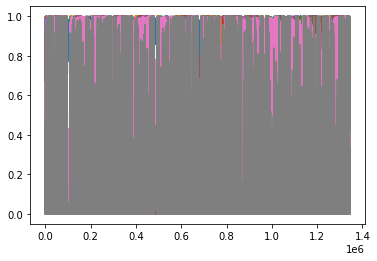

In [10]:
plt.plot(predictions)

In [11]:
predictions.shape

(1343696, 8)